In [281]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import *
import seaborn as sns
import datetime
from pyecharts.charts import Bar

In [2]:
data = pd.read_csv('dailyprice.txt',header=0, delimiter='\t')

In [3]:
df=data

In [4]:
#更改日期格式
df['datetime']=pd.to_datetime(df['datetime'],format="%Y-%m-%d")

In [7]:
one =df[df['trade_code']=='000676.SZ']

In [30]:
one['year']=one['datetime'].apply(lambda x: datetime.datetime.strftime(x,'%Y'))
one['month']=one['datetime'].apply(lambda x: datetime.datetime.strftime(x,'%m'))

B:\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
B:\anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [81]:
onetest = one[['volume','year','month']]

In [87]:
#在python中使用数据透视表pd.pivot来计算每年每月的volume累计
add = pd.pivot_table(onetest,index=["year","month"],values=["volume"],aggfunc=np.sum)

In [99]:
add=add.reset_index()

In [100]:
adduse=add.pivot(index='year',columns='month',values='volume')

Text(0.5, 1.0, 'total volume by year & month')

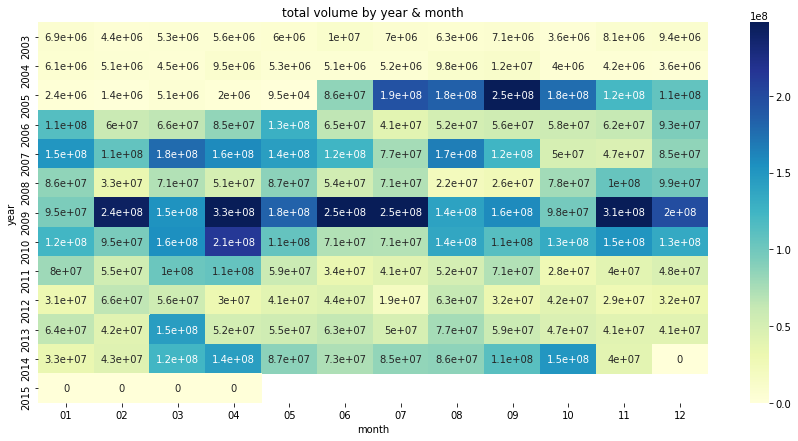

In [113]:
plt.figure(figsize=(15,7))
sns.heatmap(adduse,cmap="YlGnBu",robust=True,annot=True)
plt.title("total volume by year & month")

In [114]:
one.head()

,datetime,trade_code,open,high,low,close,volume,amt,chg,pct_chg,...,free_turn,total_shares,mkt_cap,free_float_shares,mkt_freeshares,annualstdevr_100w,dividendyield2,trade_status,year,month
233,2003-01-02,000676.SZ,17.89,17.90,17.77,17.83,184900.0,3297236.0,-0.06,-0.3354,...,0.1892,314586699.0,5.609081e+09,97750000.0,1.742882e+09,17.1869,0.3365,1.0,2003,01
1365,2003-01-03,000676.SZ,17.75,17.87,17.70,17.79,133991.0,2382810.1,-0.04,-0.2243,...,0.1371,314586699.0,5.596497e+09,97750000.0,1.738972e+09,17.1502,0.3373,1.0,2003,01
2497,2003-01-06,000676.SZ,17.79,17.86,17.69,17.82,184929.0,3291305.2,0.03,0.1686,...,0.1892,314586699.0,5.605935e+09,97750000.0,1.741905e+09,17.1502,0.3367,1.0,2003,01
3630,2003-01-07,000676.SZ,17.82,17.88,17.71,17.83,160300.0,2854775.0,0.01,0.0561,...,0.1640,314586699.0,5.609081e+09,97750000.0,1.742882e+09,17.1502,0.3365,1.0,2003,01
4764,2003-01-08,000676.SZ,17.83,17.88,17.70,17.86,150343.0,2679141.0,0.03,0.1683,...,0.1538,314586699.0,5.618518e+09,97750000.0,1.745815e+09,17.1502,0.3359,1.0,2003,01


In [115]:
test_21 = df[df['trade_code']=='000676.SZ']
test_22=df[df['trade_code']=='000551.SZ']
test_23 = df[df['trade_code']=='000671.SZ']
test_2 = pd.concat([test_21,test_22,test_23],axis=0)

In [119]:
test_2 = test_2.set_index('datetime')

In [121]:
test2 = test_2['2008']

In [123]:
use = test2[['trade_code','open','high','low','close']]

In [124]:
use.head()

,trade_code,open,high,low,close
datetime,,,,,
2008-01-02,000676.SZ,6.90,7.18,6.88,7.14
2008-01-03,000676.SZ,7.14,7.43,7.09,7.38
2008-01-04,000676.SZ,7.40,7.44,7.22,7.30
2008-01-07,000676.SZ,7.28,7.49,7.28,7.45
2008-01-08,000676.SZ,7.48,7.50,7.03,7.10


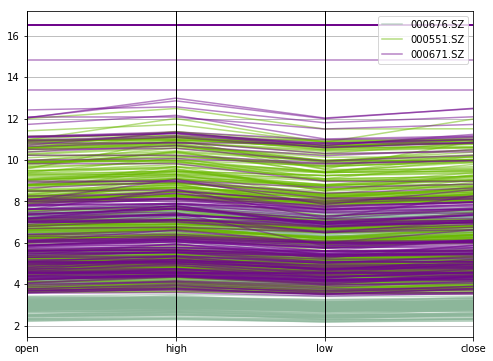

In [128]:
plt.figure(figsize=(8,6))
from pandas.plotting import parallel_coordinates
parallel_coordinates(use,'trade_code',alpha=0.5)

In [130]:
import pygal

In [132]:
use2= test2[['trade_code','open','high','low','close','chg','turn','mkt_cap']]

In [133]:
use2.head()

,trade_code,open,high,low,close,chg,turn,mkt_cap
datetime,,,,,,,,
2008-01-02,000676.SZ,6.90,7.18,6.88,7.14,0.27,2.1676,2.246149e+09
2008-01-03,000676.SZ,7.14,7.43,7.09,7.38,0.24,3.0858,2.321650e+09
2008-01-04,000676.SZ,7.40,7.44,7.22,7.30,-0.08,1.7568,2.296483e+09
2008-01-07,000676.SZ,7.28,7.49,7.28,7.45,0.15,2.1487,2.343671e+09
2008-01-08,000676.SZ,7.48,7.50,7.03,7.10,-0.35,2.2631,2.233566e+09


In [139]:
from IPython.display import SVG

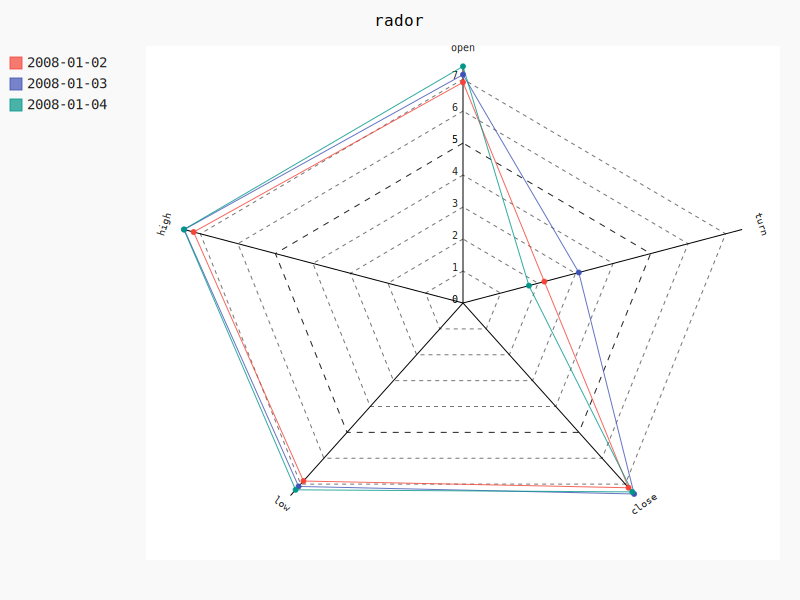

<Figure size 360x360 with 0 Axes>

In [154]:
plt.figure(figsize=(5,5))
radar_chart = pygal.Radar()
radar_chart.title = 'rador'
radar_chart.x_labels = ['open','high','low','close','turn']
radar_chart.add('2008-01-02', [6.90,7.18,6.88,7.14,2.1676])
radar_chart.add('2008-01-03', [7.14,7.43,7.09,7.38,3.0858])
radar_chart.add('2008-01-04', [7.40,7.44,7.22,7.30,1.7568])
display(SVG(radar_chart.render()))


In [165]:
dfu=pd.DataFrame(adduse)

In [176]:
from pyecharts.charts import Bar
v2011 = dfu.iloc[8, :].values
v2012 = adduse.iloc[9, :].values
v2013 = adduse.iloc[10, :].values

In [184]:
y=['2011','2012','2013']
month = dfu.columns.tolist()
bar = Bar("bar")
bar.add('2011', y, v2011, is_stack=True, xaxis_interval=0, xaxis_rotate=30)
bar.add('2012', y, v2012, is_stack=True, xaxis_interval=0, xaxis_rotate=30)
bar.add('2013', y, v2013, is_stack=True, xaxis_interval=0, xaxis_rotate=30)
bar #输出


AttributeError: 'str' object has no attribute 'get'

In [190]:
test_2

,trade_code,open,high,low,close,volume,amt,chg,pct_chg,adjfactor,turn,free_turn,total_shares,mkt_cap,free_float_shares,mkt_freeshares,annualstdevr_100w,dividendyield2,trade_status
datetime,,,,,,,,,,,,,,,,,,,
2003-01-02,000676.SZ,17.89,17.90,17.77,17.83,184900.0,3297236.0,-0.06,-0.3354,5.976532,0.1892,0.1892,3.145867e+08,5.609081e+09,97750000.0,1.742882e+09,17.1869,0.3365,1.0
2003-01-03,000676.SZ,17.75,17.87,17.70,17.79,133991.0,2382810.1,-0.04,-0.2243,5.976532,0.1371,0.1371,3.145867e+08,5.596497e+09,97750000.0,1.738972e+09,17.1502,0.3373,1.0
2003-01-06,000676.SZ,17.79,17.86,17.69,17.82,184929.0,3291305.2,0.03,0.1686,5.976532,0.1892,0.1892,3.145867e+08,5.605935e+09,97750000.0,1.741905e+09,17.1502,0.3367,1.0
2003-01-07,000676.SZ,17.82,17.88,17.71,17.83,160300.0,2854775.0,0.01,0.0561,5.976532,0.1640,0.1640,3.145867e+08,5.609081e+09,97750000.0,1.742882e+09,17.1502,0.3365,1.0
2003-01-08,000676.SZ,17.83,17.88,17.70,17.86,150343.0,2679141.0,0.03,0.1683,5.976532,0.1538,0.1538,3.145867e+08,5.618518e+09,97750000.0,1.745815e+09,17.1502,0.3359,1.0
2003-01-09,000676.SZ,17.86,17.96,17.76,17.93,361036.0,6452541.1,0.07,0.3919,5.976532,0.3693,0.3693,3.145867e+08,5.640540e+09,97750000.0,1.752658e+09,17.1502,0.3346,1.0
2003-01-10,000676.SZ,17.90,17.97,17.32,17.33,206400.0,3656128.5,-0.60,-3.3463,5.976532,0.2112,0.2112,3.145867e+08,5.451787e+09,97750000.0,1.694008e+09,17.2655,0.3462,1.0
2003-01-13,000676.SZ,17.40,17.44,16.98,16.99,130700.0,2258119.1,-0.34,-1.9619,5.976532,0.1337,0.1337,3.145867e+08,5.344828e+09,97750000.0,1.660772e+09,17.2655,0.3531,1.0
2003-01-14,000676.SZ,17.05,17.11,16.75,17.06,406272.0,6895918.0,0.07,0.4120,5.976532,0.4156,0.4156,3.145867e+08,5.366849e+09,97750000.0,1.667615e+09,17.2655,0.3517,1.0


In [203]:
test_2=test_2.reset_index()

In [204]:
import datetime
test_2['year']=test_2['datetime'].apply(lambda x: datetime.datetime.strftime(x,'%Y'))

In [205]:
test_2

,datetime,trade_code,open,high,low,close,volume,amt,chg,pct_chg,...,turn,free_turn,total_shares,mkt_cap,free_float_shares,mkt_freeshares,annualstdevr_100w,dividendyield2,trade_status,year
0,2003-01-02,000676.SZ,17.89,17.90,17.77,17.83,184900.0,3297236.0,-0.06,-0.3354,...,0.1892,0.1892,3.145867e+08,5.609081e+09,97750000.0,1.742882e+09,17.1869,0.3365,1.0,2003
1,2003-01-03,000676.SZ,17.75,17.87,17.70,17.79,133991.0,2382810.1,-0.04,-0.2243,...,0.1371,0.1371,3.145867e+08,5.596497e+09,97750000.0,1.738972e+09,17.1502,0.3373,1.0,2003
2,2003-01-06,000676.SZ,17.79,17.86,17.69,17.82,184929.0,3291305.2,0.03,0.1686,...,0.1892,0.1892,3.145867e+08,5.605935e+09,97750000.0,1.741905e+09,17.1502,0.3367,1.0,2003
3,2003-01-07,000676.SZ,17.82,17.88,17.71,17.83,160300.0,2854775.0,0.01,0.0561,...,0.1640,0.1640,3.145867e+08,5.609081e+09,97750000.0,1.742882e+09,17.1502,0.3365,1.0,2003
4,2003-01-08,000676.SZ,17.83,17.88,17.70,17.86,150343.0,2679141.0,0.03,0.1683,...,0.1538,0.1538,3.145867e+08,5.618518e+09,97750000.0,1.745815e+09,17.1502,0.3359,1.0,2003
5,2003-01-09,000676.SZ,17.86,17.96,17.76,17.93,361036.0,6452541.1,0.07,0.3919,...,0.3693,0.3693,3.145867e+08,5.640540e+09,97750000.0,1.752658e+09,17.1502,0.3346,1.0,2003
6,2003-01-10,000676.SZ,17.90,17.97,17.32,17.33,206400.0,3656128.5,-0.60,-3.3463,...,0.2112,0.2112,3.145867e+08,5.451787e+09,97750000.0,1.694008e+09,17.2655,0.3462,1.0,2003
7,2003-01-13,000676.SZ,17.40,17.44,16.98,16.99,130700.0,2258119.1,-0.34,-1.9619,...,0.1337,0.1337,3.145867e+08,5.344828e+09,97750000.0,1.660772e+09,17.2655,0.3531,1.0,2003
8,2003-01-14,000676.SZ,17.05,17.11,16.75,17.06,406272.0,6895918.0,0.07,0.4120,...,0.4156,0.4156,3.145867e+08,5.366849e+09,97750000.0,1.667615e+09,17.2655,0.3517,1.0,2003
9,2003-01-15,000676.SZ,17.05,17.10,16.50,16.54,296800.0,4972060.0,-0.52,-3.0481,...,0.3036,0.3036,3.145867e+08,5.203264e+09,97750000.0,1.616785e+09,17.2655,0.3628,1.0,2003


In [209]:
a = test_2.set_index('datetime')

In [216]:
b=a['2008':'2010']

In [218]:
c = b[['trade_code','volume','year']]

In [223]:
c=c.reset_index()

In [226]:
add_c = pd.pivot_table(c,index=["year","trade_code"],values=["volume"],aggfunc=np.sum)

In [227]:
add_c

volume
year trade_code              
2008 000551.SZ   8.934205e+08
     000671.SZ   2.118204e+08
     000676.SZ   7.842925e+08
2009 000551.SZ   1.774173e+09
     000671.SZ   8.280683e+08
     000676.SZ   2.407060e+09
2010 000551.SZ   2.397785e+09
     000671.SZ   2.132811e+09
     000676.SZ   1.504275e+09

In [230]:
add_c=add_c.reset_index()

In [231]:
add_c.set_index('trade_code')

,year,volume
trade_code,,
000551.SZ,2008,8.934205e+08
000671.SZ,2008,2.118204e+08
000676.SZ,2008,7.842925e+08
000551.SZ,2009,1.774173e+09
000671.SZ,2009,8.280683e+08
000676.SZ,2009,2.407060e+09
000551.SZ,2010,2.397785e+09
000671.SZ,2010,2.132811e+09
000676.SZ,2010,1.504275e+09


In [275]:
volume =add_c['volume'].tolist()

In [278]:
labels = testdf.index.values.tolist()

In [279]:
labels

['000551.SZ', '000671.SZ', '000676.SZ']

In [280]:
from pyecharts.charts import Bar
from pyecharts import options as opts
labels = testdf.index.values.tolist()
bar = (
    Bar()
    .add_xaxis(['000551.SZ', '000671.SZ', '000676.SZ'])
    .add_yaxis("2008", [893420460.0,211820364.0,784292544.0])
    .add_yaxis("2009", [1774172792.0,828068280.0,2407059504.0,])
    .add_yaxis('2010',[2397785331.0,2132810762.0,1504274615.0])
    .set_global_opts(title_opts=opts.TitleOpts(title="2008~2010成交量"))
)
bar.render()


'C:\\Users\\oasis\\Desktop\\render.html'

In [282]:
c

,datetime,trade_code,volume,year
0,2008-01-02,000676.SZ,3756532.0,2008
1,2008-01-03,000676.SZ,5347728.0,2008
2,2008-01-04,000676.SZ,3044612.0,2008
3,2008-01-07,000676.SZ,3723722.0,2008
4,2008-01-08,000676.SZ,3921916.0,2008
5,2008-01-09,000676.SZ,2411777.0,2008
6,2008-01-10,000676.SZ,3458514.0,2008
7,2008-01-11,000676.SZ,2658053.0,2008
8,2008-01-14,000676.SZ,3704897.0,2008
9,2008-01-15,000676.SZ,7485689.0,2008


In [292]:
c1=c[c['trade_code']=='000551.SZ']
c2=c[c['trade_code']=='000671.SZ']
c3=c[c['trade_code']=='000676.SZ']

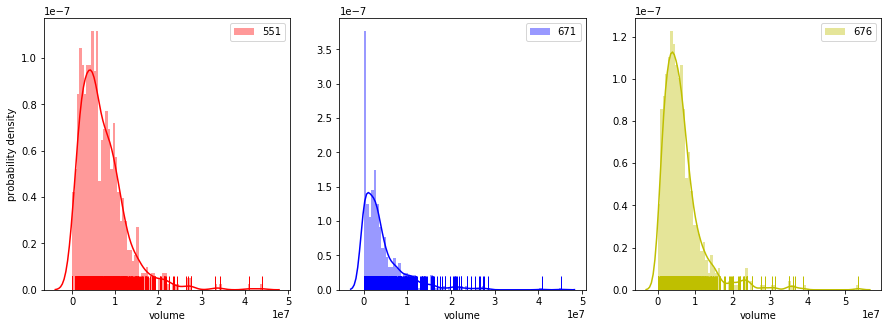

In [306]:
import seaborn as sns 
plt.figure(figsize = (15,5))
sns.set_palette("hls") 
plt.subplot(1,3,1)
plt.ylabel("probability density")
sns.distplot(c1['volume'],color="r",bins=80,kde=True,hist=True,rug=True,label='551')
plt.legend()
plt.subplot(1,3,2)
sns.distplot(c2['volume'],color="b",bins=80,kde=True,hist=True,rug=True,label='671')
plt.legend()
plt.subplot(1,3,3)
sns.distplot(c3['volume'],color="y",bins=80,kde=True,hist=True,rug=True,label='676')
plt.xlabel("volume")
plt.legend()

In [307]:
c1=c1[c1['volume']!=0]
c2=c2[c2['volume']!=0]
c3=c3[c3['volume']!=0]

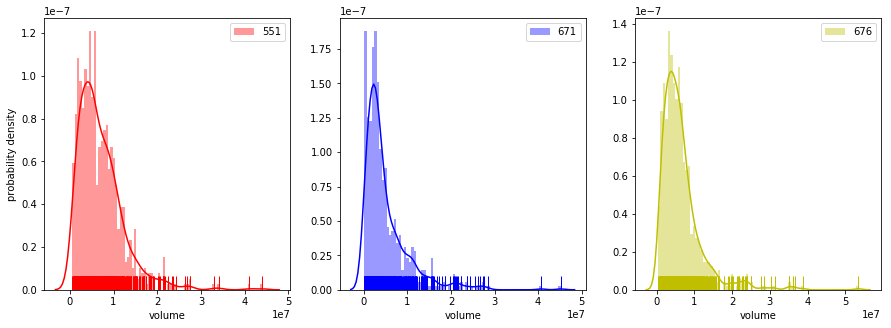

In [308]:
plt.figure(figsize = (15,5))
sns.set_palette("hls") 
plt.subplot(1,3,1)
plt.ylabel("probability density")
sns.distplot(c1['volume'],color="r",bins=80,kde=True,hist=True,rug=True,label='551')
plt.legend()
plt.subplot(1,3,2)
sns.distplot(c2['volume'],color="b",bins=80,kde=True,hist=True,rug=True,label='671')
plt.legend()
plt.subplot(1,3,3)
sns.distplot(c3['volume'],color="y",bins=80,kde=True,hist=True,rug=True,label='676')
plt.xlabel("volume")
plt.legend()

In [311]:
c['year']=c['datetime'].apply(lambda x: datetime.datetime.strftime(x,'%Y'))

In [313]:
c.tail()

,datetime,trade_code,volume,year
2191,2010-12-27,000671.SZ,13383109.0,2010
2192,2010-12-28,000671.SZ,7243813.0,2010
2193,2010-12-29,000671.SZ,5188868.0,2010
2194,2010-12-30,000671.SZ,4992072.0,2010
2195,2010-12-31,000671.SZ,5779194.0,2010


In [315]:
c=c[c['volume']!=0]

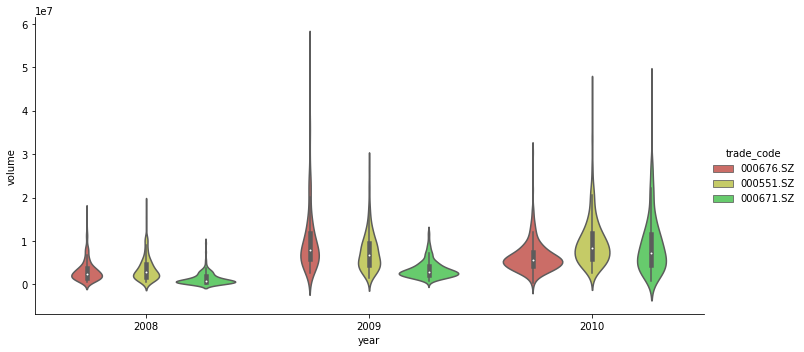

In [320]:
sns.catplot(x='year',y='volume',hue='trade_code',kind='violin',data=c,aspect=2)

In [324]:
c_par=c[c['volume']< 23000000]

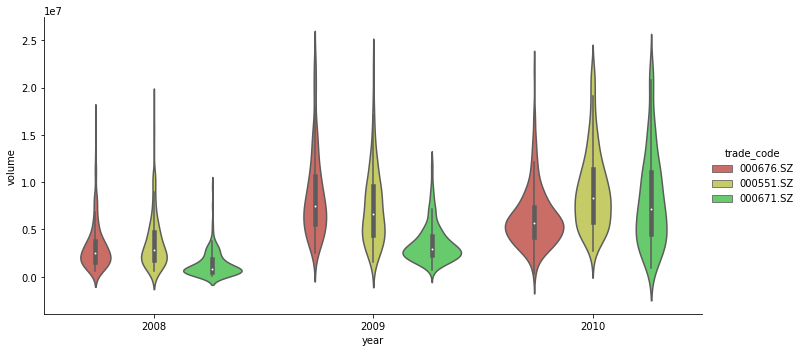

In [398]:
sns.catplot(x='year',y='volume',hue='trade_code',kind='violin',data=c_par,aspect=2,showfliers=False)

In [390]:
x2 = np.random.exponential(0.1,100*100)

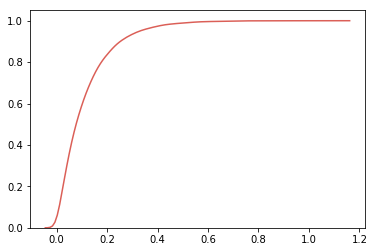

In [393]:
sns.kdeplot(x2,cumulative=True)

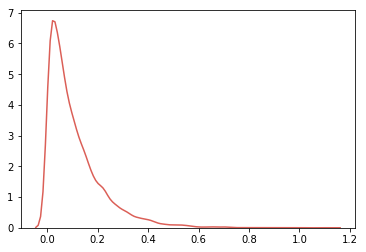

In [392]:

sns.kdeplot(x2,cumulative=False)

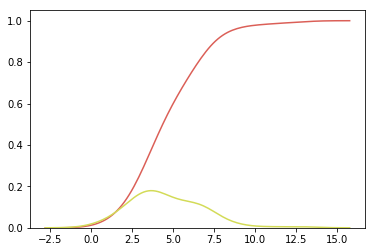

In [350]:
#sns.kdeplot(x1,cumulative=True)
sns.kdeplot(x1,cumulative=False)